# A Network Tour of Data Science
### &nbsp; &nbsp; &nbsp; Xavier Bresson, Winter 2016/17
## Assignment 1 : Unsupervised Clustering with the Normalized Association

In [1]:
# Load libraries

# Math
import numpy as np

# Visualization 
%matplotlib notebook 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

# Print output of LFR code
import subprocess

# Sparse matrix
import scipy.sparse
import scipy.sparse.linalg

# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

# Import data
import scipy.io

# Import functions in lib folder
import sys
sys.path.insert(1, 'lib')

# Import helper functions
%load_ext autoreload
%autoreload 2
from lib.utils import construct_kernel
from lib.utils import compute_kernel_kmeans_EM
from lib.utils import compute_purity

# Import distance function
import sklearn.metrics.pairwise

# Remove warnings
import warnings
warnings.filterwarnings("ignore")

**Question 1:** Write down the mathematical relationship between Normalized Cut (NCut) and Normalized Association (NAssoc) for K clusters. It is not necessary to provide details.

The Normalized Cut problem is defined as:<br><br>
$$
\min_{\{S_k\}}\   NCut(\{S_k\}) := \sum_{k=1}^K \frac{Cut(S_k,S_k^c)}{Vol(S_k)} \ \textrm{ s.t. } \ \cup_{k=1}^{K} S_k = V, \ S_k \cap S_{k'}=\emptyset, \ \forall k \not= k' \quad\quad\quad(1)
$$

and the Normalized Association problem is defined as:<br><br>
$$
\max_{\{S_k\}}\   NAssoc(\{S_k\}):= \sum_{k=1}^K \frac{Assoc(S_k,S_k)}{Vol(S_k)} \ \textrm{ s.t. } \ \cup_{k=1}^{K} S_k = V, \ S_k \cap S_{k'}=\emptyset, \ \forall k \not= k' .
$$


We may rewrite the Cut operator and the Volume operator with the Assoc operator as:<br><br>
$$
Vol(S_k) = \sum_{i\in S_k, j\in V} W_{ij} \\
Assoc(S_k,S_k) = \sum_{i\in S_k, j\in S_k} W_{ij} \\
Cut(S_k,S_k^c) = \sum_{i\in S_k, j\in S_k^c=V\setminus S_k} W_{ij} = \sum_{i\in S_k, j\in V} W_{ij} - \sum_{i\in S_k, j\in S_k} W_{ij}  =  Vol(S_k) - Assoc(S_k,S_k) 
$$



**Answer to Q1:** Your answer here.

$$
NCut(\{S_k\}) = K - NAssoc(\{S_k\}) 
$$

**Question 2:** Using the relationship between NCut and NAssoc from Q1, it is therefore equivalent to maximize NAssoc by minimizing or maximizing NCut? That is 

$$
\max_{\{S_k\}}\  NAssoc(\{S_k\}) \ \textrm{ s.t. } \cup_{k=1}^{K} S_k = V, \quad S_k \cap S_{k'}=\emptyset, \ \forall k \not= k'
$$

$$
\Updownarrow
$$

$$
\min_{\{S_k\}}\  NCut(\{S_k\}) \ \textrm{ s.t. } \cup_{k=1}^{K} S_k = V, \quad S_k \cap S_{k'}=\emptyset, \ \forall k \not= k'
$$

or

$$
\max_{\{S_k\}}\  NCut(\{S_k\}) \ \textrm{ s.t. } \cup_{k=1}^{K} S_k = V, \quad S_k \cap S_{k'}=\emptyset, \ \forall k \not= k'
$$

It is not necessary to provide details.

**Answer to Q2:** Your answer here. \

We need to minimize NCut

**Question 3:** Solving the NCut problem in Q2 is NP-hard => let us consider a spectral relaxation of NCut. Write down the Spectral Matrix A of NCut that satisfies the equivalent functional optimization problem of Q2: 

$$
\min_{Y}\ tr( Y^\top A Y) \ \textrm{ s.t. } \ Y^\top Y = I_K \textrm{ and } Y \in Ind_S, \quad\quad\quad(3)
$$

where

$$
Y \in Ind_S \ \textrm{ reads as } \ Y_{ik} = 
\left\{
\begin{array}{ll}
\big(\frac{D_{ii}}{Vol(S_k)}\big)^{1/2} & \textrm{if}  \ i \in S_k\\
0 & \textrm{otherwise}
\end{array}
\right..
$$

and

$$
A=???
$$

It is not necessary to provide details.

*Hint:* Let us introduce the indicator matrix $F$ of the clusters $S_k$ such that:

$$
F_{ik} = 
\left\{
\begin{array}{ll}
1 & \textrm{if}  \ i \in S_k\\
0 & \textrm{otherwise}
\end{array}
\right..
$$

We may rewrite the Cut operator and the Volume operator with $F$ as:

$$
Vol(S_k) = \sum_{i\in S_k, j\in V} W_{ij} = F_{\cdot,k}^\top D F_{\cdot,k}\\
Cut(S_k,S_k^c) = \sum_{i\in S_k, j\in V} W_{ij} - \sum_{i\in S_k, j\in S_k} W_{ij}   = F_{\cdot,k}^\top D F_{\cdot,k} - F_{\cdot,k}^\top W F_{\cdot,k} = F_{\cdot,k}^\top (D - W) F_{\cdot,k} \quad
$$

We thus have

$$
\frac{Cut(S_k,S_k^c)}{Vol(S_k)} = \frac{ F_{\cdot,k}^\top (D - W) F_{\cdot,k} }{ F_{\cdot,k}^\top D F_{\cdot,k} } 
$$


Set $\hat{F}_{\cdot,k}=D^{1/2}F_{\cdot,k}$ and observe that

$$
\frac{ F_{\cdot,k}^\top (D - W) F_{\cdot,k} }{ F_{\cdot,k}^\top D F_{\cdot,k} } = \frac{ \hat{F}_{\cdot,k}^\top D^{-1/2}(D - W)D^{-1/2} \hat{F}_{\cdot,k} }{ \hat{F}_{\cdot,k}^\top  \hat{F}_{\cdot,k} } = \frac{ \hat{F}_{\cdot,k}^\top (I - D^{-1/2}WD^{-1/2}) \hat{F}_{\cdot,k} }{ \hat{F}_{\cdot,k}^\top  \hat{F}_{\cdot,k} } ,
$$

with $L_N=I - D^{-1/2}WD^{-1/2}$ is the normalized graph Laplacian. Set $Y_{\cdot,k}=\frac{\hat{F}_{\cdot,k}}{\|\hat{F}_{\cdot,k}\|_2}$:

$$
\frac{ \hat{F}_{\cdot,k}^\top L_N \hat{F}_{\cdot,k} }{ \hat{F}_{\cdot,k}^\top  \hat{F}_{\cdot,k} } = Y_{\cdot,k}^\top L_N Y_{\cdot,k} \quad\quad\quad(2)
$$


Using (2), we can rewrite (1) as a functional optimization problem:

$$
\min_{Y}\ tr( Y^\top A Y) \ \textrm{ s.t. } \ Y^\top Y = I_K \textrm{ and } Y \in Ind_S,
$$

where


$$
Y \in Ind_S \ \textrm{ reads as } \ Y_{ik} = 
\left\{
\begin{array}{ll}
\big(\frac{D_{ii}}{Vol(S_k)}\big)^{1/2} & \textrm{if}  \ i \in S_k\\
0 & \textrm{otherwise}
\end{array}
\right..
$$

and

$$
A=???
$$

**Answer to Q3:** 

$$
A=L_N
$$

**Question 4:** Drop the cluster indicator constraint $Y\in Ind_S$ in Q3, how do you compute the solution $Y^\star$ of (3)? Why the first column of $Y^\star$ is not relevant for clustering?

**Answer to Q4:** Your answer here.

We compute $Y^*$ by computing the EVD of $A$.

For any clustering, the eigenvalues are counted in increasing order (the smallest eigenvalue first). Hence, the first column is not relevant here.

**Question 5:** Plot in 3D the 2nd, 3rd, 4th columns of $Y^\star$. <br>
Hint: Compute the degree matrix $D$.<br>
Hint: You may use function *D_sqrt_inv = scipy.sparse.diags(d_sqrt_inv.A.squeeze(), 0)* for creating $D^{-1/2}$.<br>
Hint: You may use function *I = scipy.sparse.identity(d.size, dtype=W.dtype)* for creating a sparse identity matrix.<br>
Hint: You may use function *lamb, U = scipy.sparse.linalg.eigsh(A, k=4, which='SM')* to perform the eigenvalue decomposition of A.<br> 
Hint: You may use function *ax.scatter(Xdisp, Ydisp, Zdisp, c=Cgt)* for 3D visualization.

In [2]:
# Load dataset: W is the Adjacency Matrix and Cgt is the ground truth clusters
mat = scipy.io.loadmat('datasets/mnist_2000_graph.mat')
W = mat['W']
n = W.shape[0]
Cgt = mat['Cgt'] - 1; Cgt = Cgt.squeeze()
nc = len(np.unique(Cgt))
print('Number of nodes =',n)
print('Number of classes =',nc);

Number of nodes = 2000
Number of classes = 10


In [16]:
# Degree Matrix
d = scipy.sparse.csr_matrix.sum(W,axis=-1)

# Compute D^(-0.5)
d_sqrt = np.sqrt(d)
d_sqrt_inv = 1./d_sqrt
D_sqrt_inv = scipy.sparse.diags(d_sqrt_inv.A.squeeze(), 0)

# Create Identity matrix
I = scipy.sparse.identity(d.size, dtype=W.dtype) 

# Construct A
A = I - D_sqrt_inv*W*D_sqrt_inv

# Perform EVD on A
U = scipy.sparse.linalg.eigsh(A, k=4, which='SM')

<2000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2000 stored elements (1 diagonals) in DIAgonal format>

<IPython.core.display.Javascript object>


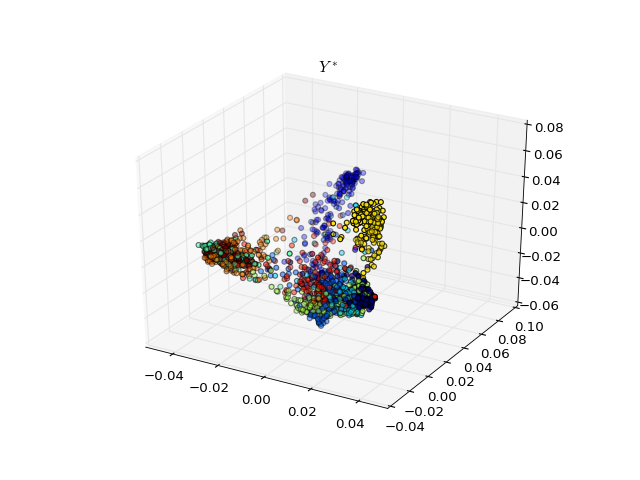

In [35]:
fig = plt.figure(1)
ax = fig.gca(projection='3d')
ax.scatter(U[1][:,1], U[1][:,2], U[1][:,3], c=Cgt)
plt.title('$Y^*$')

**Question 6:** Solve the unsupervised clustering problem for MNIST following the popular technique of [Ng, Jordan, Weiss, “On Spectral Clustering: Analysis and an algorithm”, 2002], i.e. <br>
(1) Compute $Y^\star$? solution of Q4. <br>
(2) Normalize the rows of $Y^\star$? with the L2-norm. <br>
Hint: You may use function X = ( X.T / np.sqrt(np.sum(X**2,axis=1)+1e-10) ).T  for the L2-normalization of the rows of X.<br>
(3) Run standard K-Means on normalized $Y^\star$? to get the clusters, and compute the clustering accuracy. You should get more than 50% accuracy. 

In [32]:
# Your code here
#lamb, Y_star = scipy.sparse.linalg.eigsh(A, k=4, which='SM')
# Normalize the rows of Y* with the L2 norm, i.e. ||y_i||_2 = 1
#Y_star = Y_star/np.sqrt(np.sum((Y_star)**2))
Y_star = U[1]
Y_star = ( Y_star.T / np.sqrt(np.sum(Y_star**2,axis=1)+1e-10) ).T

In [38]:
# Your code here
# Run standard K-Means
Ker=construct_kernel(Y_star,'linear')
n = Y_star.shape[0]
Theta= np.ones(n)
[C_kmeans, En_kmeans]=compute_kernel_kmeans_EM(nc,Ker,Theta,10)
accuracy = compute_purity(C_kmeans,Cgt,nc)
print('accuracy = ',accuracy,'%')

Construct Linear Kernel
accuracy =  55.900000000000006 %


<IPython.core.display.Javascript object>


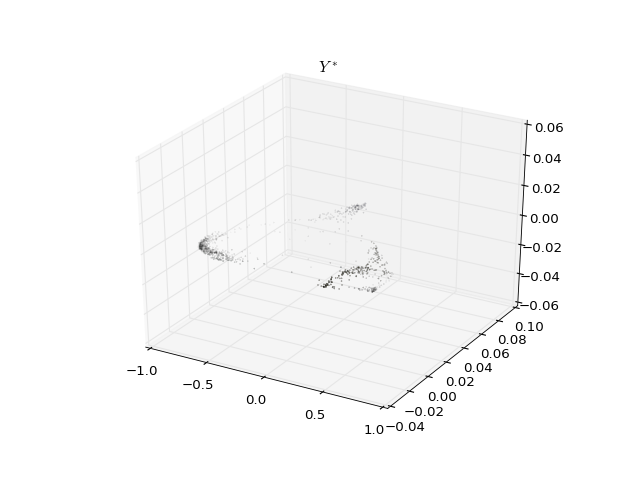

In [37]:
fig = plt.figure(2)
ax = fig.gca(projection='3d')
plt.scatter(Y_star[:,1], U[1][:,2], U[1][:,3], c=Cgt)
plt.title('$Y^*$')